In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('tesla.csv', encoding='utf-8')
df.columns = ['Company', 'Star_Rating', 'Current_Employee', 'Work_Duration', 'Review_Title', 'Date_Posted', 'Job_\t\t\t\tTitle', 'Job_Location', 'Recommend', 'CEO_Approval', 'Business_Outlook', 'Pros', 'Cons', 'Advice_to_\t\t\tManagement']
df.columns = [c.replace(' ', '_') for c in df.columns]


In [6]:

df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], dayfirst=True)


In [7]:
df = df[~(df['Date_Posted'] < '2016-01-01')]


In [8]:
quarters = pd.Series(pd.date_range('2016-01-01', '2022-12-31', freq='QS'))


In [9]:
aggregates = dict()
counts = dict()
count = 0
for q in quarters:
	aggregates[f'Q{count+1}'] = 0
	counts[f'Q{count+1}'] = 0
	count += 1

In [10]:
for idx, row in df.iterrows():
	for i in range(len(quarters)):
		if i < len(quarters) - 1:
			if row['Date_Posted'] >= quarters[i] and row['Date_Posted'] < quarters[i+1]:
				aggregates[f'Q{i+1}'] += row['Star_Rating']
				counts[f'Q{i+1}'] += 1

In [11]:
print(aggregates)
print(counts)

{'Q1': 250.0, 'Q2': 193.0, 'Q3': 305.0, 'Q4': 271.0, 'Q5': 254.0, 'Q6': 265.0, 'Q7': 385.0, 'Q8': 439.0, 'Q9': 519.0, 'Q10': 519.0, 'Q11': 683.0, 'Q12': 495.0, 'Q13': 720.0, 'Q14': 603.0, 'Q15': 533.0, 'Q16': 460.0, 'Q17': 443.0, 'Q18': 363.0, 'Q19': 700.0, 'Q20': 962.0, 'Q21': 1975.0, 'Q22': 1405.0, 'Q23': 1394.0, 'Q24': 1149.0, 'Q25': 1198.0, 'Q26': 0, 'Q27': 0, 'Q28': 0}
{'Q1': 66, 'Q2': 57, 'Q3': 85, 'Q4': 81, 'Q5': 68, 'Q6': 79, 'Q7': 118, 'Q8': 138, 'Q9': 153, 'Q10': 157, 'Q11': 203, 'Q12': 142, 'Q13': 221, 'Q14': 189, 'Q15': 170, 'Q16': 135, 'Q17': 121, 'Q18': 99, 'Q19': 183, 'Q20': 253, 'Q21': 506, 'Q22': 379, 'Q23': 387, 'Q24': 321, 'Q25': 332, 'Q26': 0, 'Q27': 0, 'Q28': 0}


In [12]:
average_ratings = []
quarts = []
for key, value in aggregates.items():
	if counts[key]!=0:
		avg_rating = value/counts[key]
		average_ratings.append(avg_rating)
		quarts.append(key)
		print(key, avg_rating)

Q1 3.787878787878788
Q2 3.3859649122807016
Q3 3.588235294117647
Q4 3.345679012345679
Q5 3.735294117647059
Q6 3.3544303797468356
Q7 3.26271186440678
Q8 3.181159420289855
Q9 3.392156862745098
Q10 3.305732484076433
Q11 3.3645320197044337
Q12 3.4859154929577465
Q13 3.257918552036199
Q14 3.1904761904761907
Q15 3.135294117647059
Q16 3.4074074074074074
Q17 3.6611570247933884
Q18 3.6666666666666665
Q19 3.8251366120218577
Q20 3.802371541501976
Q21 3.9031620553359683
Q22 3.70712401055409
Q23 3.602067183462532
Q24 3.5794392523364484
Q25 3.608433734939759


In [13]:
print(average_ratings)
print(len(average_ratings))

[3.787878787878788, 3.3859649122807016, 3.588235294117647, 3.345679012345679, 3.735294117647059, 3.3544303797468356, 3.26271186440678, 3.181159420289855, 3.392156862745098, 3.305732484076433, 3.3645320197044337, 3.4859154929577465, 3.257918552036199, 3.1904761904761907, 3.135294117647059, 3.4074074074074074, 3.6611570247933884, 3.6666666666666665, 3.8251366120218577, 3.802371541501976, 3.9031620553359683, 3.70712401055409, 3.602067183462532, 3.5794392523364484, 3.608433734939759]
25


In [14]:
def normalize_list(data):
	x_min = min(data)
	x_max = max(data)
	return [(x-x_min)/(x_max-x_min) for x in data]

In [15]:
norm_ratings = normalize_list(average_ratings)
print(norm_ratings)

print(len(norm_ratings))

[0.8498657623286707, 0.32645039899451883, 0.5898685883849091, 0.2739857785074688, 0.7813843638345548, 0.28538274792319385, 0.16593705832179506, 0.05973071721270105, 0.33451422111871454, 0.2219631242090289, 0.2985381871097831, 0.4566167671565639, 0.15969469275955078, 0.07186401478777216, 0.0, 0.35437511635052976, 0.6848350886078738, 0.6920103352913866, 0.898386897688491, 0.8687397807787802, 1.0, 0.74469822848457, 0.6078819584788807, 0.5784134391991356, 0.6161731647719687]
25


Text(0, 0.5, 'Avg rating')

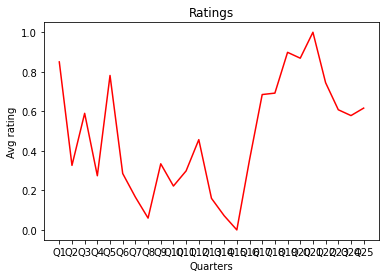

In [16]:
import matplotlib.pyplot as plt

plt.plot(quarts, norm_ratings, color = 'red')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Avg rating')


# plt.show()

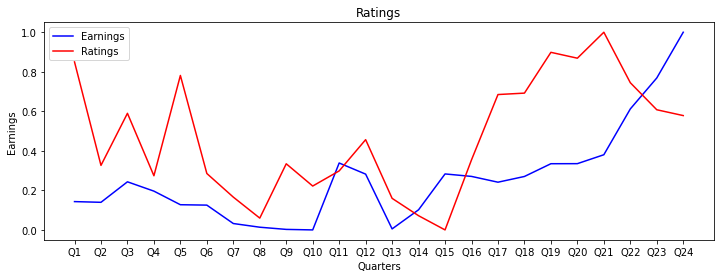

In [17]:
earnings = [
-282.27,
-293.19,
21.88,
-121.34,


-330.28,
-336.4,
-619.38,
-675.95,


-709.55,
-717.54,
311,
140,


-702,
-408,
143,
105,


16,
104,
300,
301,


438,
1142,
1618,
2321
]

# for i in range(2):
# 	earnings.insert(0, 0)
quarts = quarts[:-1]
norm_ratings = norm_ratings[:-1]
fig = plt.figure()
a = plt.plot(normalize_list(earnings), color = 'blue', label = 'Earnings')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Earnings')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()

In [18]:

print(len(quarts))
print(len(norm_ratings))
print(len(normalize_list(earnings)))
final = pd.DataFrame(
    {'quarters': quarts,
     'ratings': norm_ratings,
     'earnings': normalize_list(earnings)
    })

final.head()

24
24
24


,quarters,ratings,earnings
0,Q1,0.849866,0.143250
1,Q2,0.326450,0.139656
2,Q3,0.589869,0.243347
3,Q4,0.273986,0.196213
4,Q5,0.781384,0.127449


In [19]:
corr = final['ratings'].corr(final['earnings'], method = 'pearson')
corr

0.4340811022380954



Current lag: 0


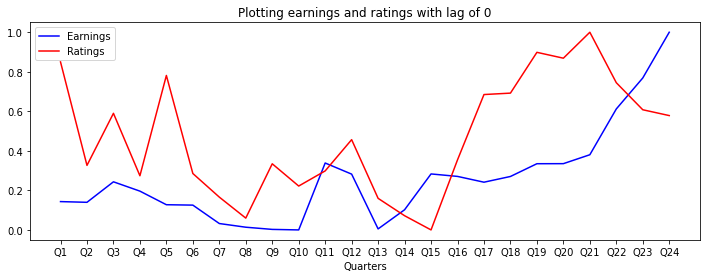

0.4340811022380954


Current lag: 1


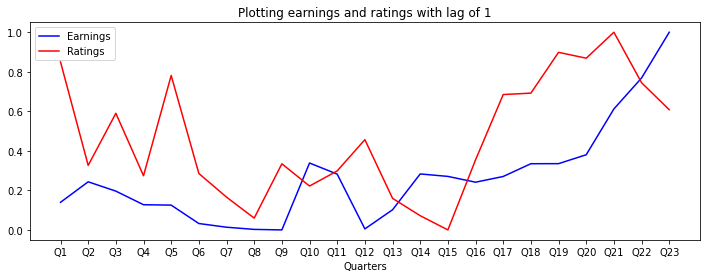

0.44477903111737116


Current lag: 2


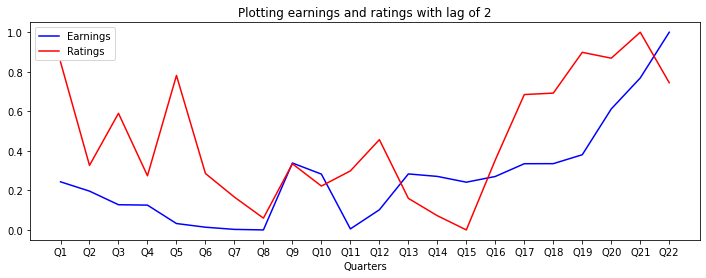

0.5494128105440329


Current lag: 3


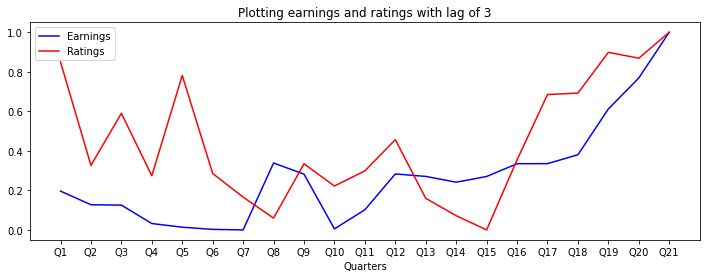

0.5709010153008769


Current lag: 4


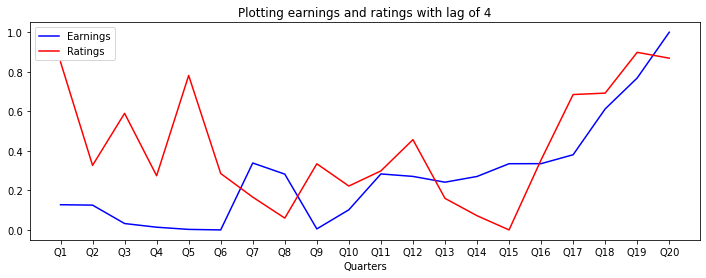

0.40239829262614324


In [20]:
for lag in range(0, 5):
	print('\n\nCurrent lag:', lag)
	fig = plt.figure()
	a = plt.plot(normalize_list(earnings)[lag:], color = 'blue', label = 'Earnings')
	if lag == 0:
		q = quarts
		r = norm_ratings
	else:	
		q = quarts[:-lag]
		r = norm_ratings[:-lag]
	plt.plot(q, r, color = 'red', label	= 'Ratings')
	plt.title('Plotting earnings and ratings with lag of ' + str(lag))
	plt.xlabel('Quarters')
	plt.ylabel('')
	plt.legend(	loc = 'upper left')
	fig.set_figwidth(12)
	plt.show()

	final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'earnings': normalize_list(earnings)[lag:]
    })
	corr = final['ratings'].corr(final['earnings'],method = 'pearson')
	print(corr)

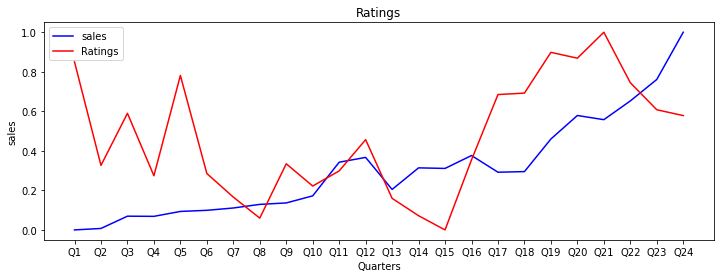

In [21]:
sales = [
1147,
1270,
2298,
2285,


2696,
2790,
2985,
3288,


3409,
4002,
6824,
7226,

4541,
6350,
6303,
7384,


5985,
6036,
8771,
10740,


10390,
11960,
13760,
17720

]

# sales = sales[::-1]
# for i in range(2):
# 	earnings.insert(0, 0)

fig = plt.figure()
a = plt.plot(normalize_list(sales), color = 'blue', label = 'sales')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('sales')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()



Current lag: 0


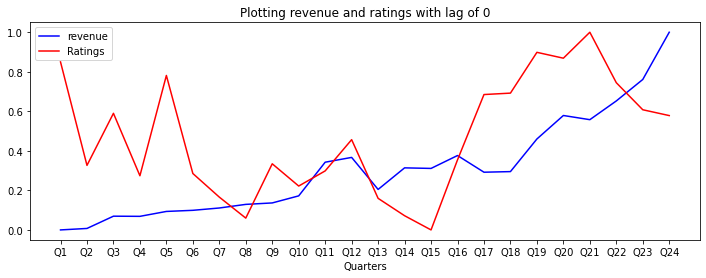

0.37420000689968147


Current lag: 1


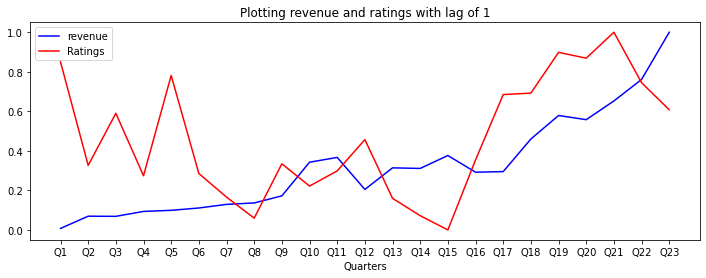

0.38618778279018584


Current lag: 2


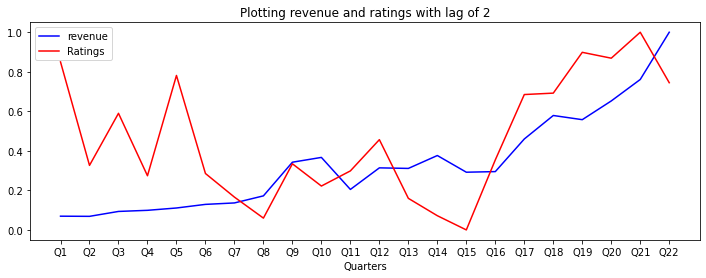

0.49308007640882584


Current lag: 3


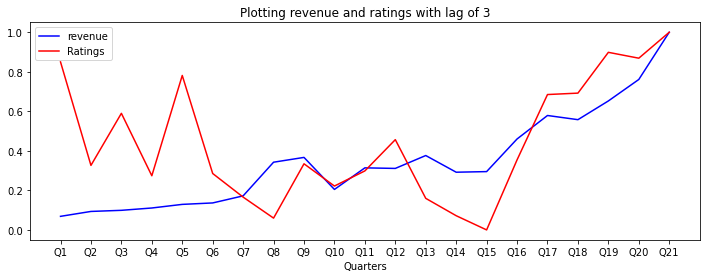

0.5089207940426178


Current lag: 4


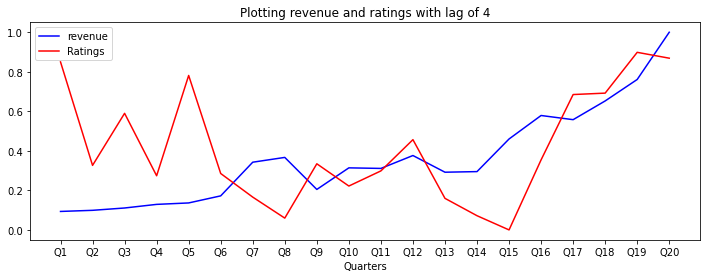

0.35141036291622385


In [22]:

for lag in range(0, 5):
    print('\n\nCurrent lag:', lag)
    fig = plt.figure()
    a = plt.plot(normalize_list(sales)[lag:], color = 'blue', label = 'revenue')
    if lag == 0:
        q = quarts
        r = norm_ratings
    else:
        q = quarts[:-lag]
        r = norm_ratings[:-lag]
    plt.plot(q, r, color = 'red', label	= 'Ratings')
    plt.title('Plotting revenue and ratings with lag of ' + str(lag))
    plt.xlabel('Quarters')
    plt.ylabel('')
    plt.legend(	loc = 'upper left')
    fig.set_figwidth(12)
    plt.show()

    final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'revenue': normalize_list(sales)[lag:]
    })
    corr = final['ratings'].corr(final['revenue'],method = 'pearson')
    print(corr)


